#Задача 1.  МНК или SVD.

**Облако точек.**

Скачайте файл, содержащий координаты облака точек в трехмерном пространстве, и распакуйте его с помощью numpy:
with np. load('data_distance_svd.npz') as data:
$$
x p, y p, z p=\text { data }\left[' x p^{\prime}\right], \text { data['yp'], data ['zp'] }
$$
Массивы содержат координаты точек: первая точка имеет координаты (хр [0], ур [0], zр [0] ), вторая точка - координаты $(\mathrm{xp}[1], \mathrm{yp}[1], \mathrm{zp}[1])$ и т.д. Нарисуйте точки на трехмерном графике. Можно заметить, что точки группируются вблизи некоторой плоскости. Задача состоит в том, чтобы построить данную плоскость. В качестве критерия выберем следующий: назовем наилучшей такую плоскость, что сумма квадратов ортогональных расстояний от точек до этой плоскости минимальна. 

- Изобразите найденную плоскость на трёхмерном графике с облаком точек. 
- Вычислите сумму квадратов расстояний точек до плоскости. 
- Найдите другую плоскость, которая соответствует минимуму сумм квадратов $(f(x_p, y_p)-z_p)^2$, где $f(x, y) = z$ - уравнение плоскости. Тоже изобразите ее на трехмерном графике с облаком точек. Вычислите для нее сумму квадратов расстояний точек до плоскости.
- Вычислите для обеих плоскостей сумму квадратов $(f(x_p, y_p)-z_p)^2$



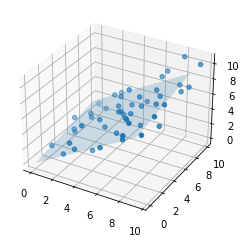

[[56.16521094]] = сумма квадратов расстояний точек до плоскости


In [63]:
import numpy as np
import matplotlib.pyplot as plt
# Загружаем данные

with np.load('data_distance_svd.npz') as data:
    xp, yp, zp = data['xp'], data['yp'], data['zp']

data = np.vstack((xp, yp, zp))
A = []
B = []

for i in range(50):
    A.append([xp[i], yp[i], i])  # Реализуем матричное представление данных  
    B.append(zp[i])
# Используем встроенное в нампай  linalg.lstsq() которое,решает задачу поиска наименьших квадратов для линейного матричного уравнения.
solution = np.linalg.lstsq(np.matrix(A), np.matrix(B).T, rcond=None)

fig = plt.figure()
xx, yy = np.meshgrid(range(10), range(10))
z = (float(solution[0][0]) * xx + float(solution[0][1]) * yy + float(solution[0][2]))
ax = fig.add_subplot(111, projection='3d')  # строим плоскость
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(xp, yp, zp)
plt.show()
print(solution[1][0], '= сумма квадратов расстояний точек до плоскости')

def erte(x, y, aa, bb):
    

#Задание 2. Погрешности.

Рассмотрим два тела массами $M_{1}$ и $M_{2}$, расположенных на расстоянии $r$ друг от друга, соединенных пружинами. Сила упругости пружины
$$
F=k*(r-r_0)
$$ 

Предположим, что значения масс известны с погрешностями измерений:
$$
\begin{aligned}
&M_{1}=40  \pm 1.5 \times 10^{-2} \mathrm{~kg} \\
&M_{2}=30  \pm 1.1 \times 10^{-1} \mathrm{~kg}
\end{aligned}
$$
и $r0=3.2 \pm 0.01 \mathrm{~cm}$.

(a) Используя стандартные правила вычисления погрешностей, вычислите значение и погрешность силы взаимодействия $F$.

(b) Пусть в начальный момент времени первому телу придали скорость 20 см/c в направлении растяжения пружины. Чему равно максимальное значение потенциальной энергии пружины в ходе движения? 

(с) Будем интерпретировать заданное значение с погрешностью как нормальное распределение с заданным средним и стандартным отклонением. Сгенерируйте $10^{5}$ случайных значений каждого из параметров, согласно заданным значениям. Для каждого набора реализаций вычислите  максимальное значение потенциальной энергии пружины в ходе движения. Начальную скорость тоже генерировать - со средним 20 см/c и стандартным отклонением 1 см/c.

(d) Постройте гистограмму (plt.hist) максимальных значений потенциальной энергии пружины и график нормального распределения со средним и дисперсией из предыдущего пункта. (Результаты должны получиться согласованными).




In [115]:
import numpy as np

M1 = 40
M2 = 30
dM1 = 1.5
dM2 = 1.1
r0 = 3.2
dr = 1e-2
v = 20
dv = 1
# При r = 4 см
def raschet(M1, M2,r, r0, dM1, dM2, dr):
    Ep = 1000 * (r-r0) * 1e-2
    dEp = 1000 * dr * 1e-2
    eEp = dEp/Ep
    return Ep, dEp, eEp #dEp - абсолютная погрешность; eEp - относительная погрешность.
F_0, dF_0, eF_0 = raschet(M1, M2, 4, r0, dM1, dM2, dr)
print(F, 'H')

(7.999999999999998, 0.1, 0.012500000000000004) H


0.34285714285714286 Дж


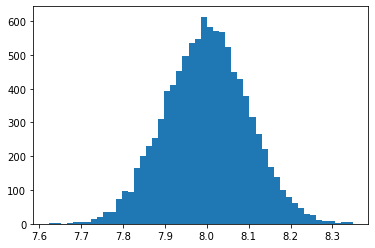

In [116]:
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.stats import norm

v1 = 20*1e-2
v2 = (M1 * v1)/(M1+M2)
Ehh = 0.5 * M1 * (v1-v2)**2 + 0.5 * M2 * (v2)**2
Ec = M1 * (v2)**2 / 2
print(Ehh, 'Дж')

M1_normal = np.random.normal(M1, dM1, 10000)
M2_normal = np.random.normal(M2, dM2, 10000)
r_normal = np.random.normal(r, dr, 10000)
F_normal, dF_normal, eF_normal = raschet(M1_normal, M2_normal, 4, r_normal, dM1, dM2, dr)
plt.hist(F_normal, bins = 50); 

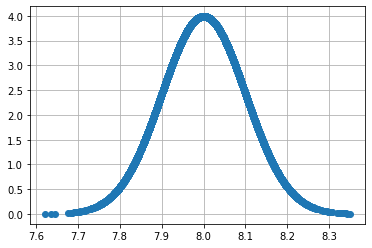

In [117]:
plt.plot(F_normal, norm.pdf(F_normal, F_0, dF_0), "o")
plt.grid()

$$ \Delta F = 1000 \dfrac{H}{m} * 0.01 * 10^{-2} m = 10^{-1} H $$

#Задача 3.  Спектры.

Рассмотрите матрицу $A$ размера $32 \times 32$, задаваемую следующей формулой:
$$
A_{i j}=-\delta_{i, j}+k*\delta_{i, j-1}+\delta_{i, j-2}
$$
- Найдите псевдоспектр матрицы $A$ при разных k, k = 1, 5, 10, 20. 
- Постройте эти псевдоспектры в виде точек на комплексной плоскости.

Чтобы построить псевдоспектр, добавляйте к матрице А случайную матрицу небольшой нормы. Используйте по 10 возмущенных матриц для каждого построения.


#Задача 4. Итерации.


Реализуйте метод простой итерации для нахождения решения следующих уравнений относительно $x$ :

(i) $1+\cos x=0$

(ii) $x^2=2$.

Используйте следующие итерационные формулы:

(i) $x_{k+1}=x_k+\frac{\cos x_k+1}{\sin x_k}$

(ii) $x_{k+1}=\frac{1}{2}\left(x_k+\frac{2}{x_k}\right)$.

В обоих случаях, стартуйте с $x_0=1$. Какова сходимость итераций (линейная/квадратичная) для случаев (i) и (ii)?

In [49]:
sumy = 1000
x = np.ones(sumy)
for i in range(sumy-1):
    x[i+1] = x[i] + (np.cos(x[i])+1)/(np.sin(x[i]))
    
qo = (np.log((x[13+1]-x[13])/(x[13]-x[13-1])))/(np.log((x[13]-x[13-1])/(x[13-1]-x[13-2])))

In [65]:
print(x[sumy-1], qo, '-> 1, значит это линейная сходимость')

1.414213562373095 0.9999999792280547 -> 1, значит это линейная сходимость


In [67]:
sumy = 1000
x = np.ones(sumy)
for i in range(sumy-1):
    x[i+1] = 0.5*(x[i] + 2/x[i])

qp = (np.log((x[3+1]-x[3])/(x[3]-x[3-1])))/(np.log((x[3]-x[3-1])/(x[3-1]-x[3-2])))
print(x[sumy-1], qp, '-> 2, значит это квадратичная сходимость')

1.414213562373095 1.9995089548825717 -> 2, значит это квадратичная сходимость


### Задача 5. Одномерный кристалл.

**Одномерный кристалл.** 

Рассмотрите одномерный кристалл с двумя атомами различной массы  $m$  и $M$   в элементарной ячейке, состоящий из $N$ элементарных ячеек (всего $2 N$ атомов), замкнутых в кольцо (периодические граничные условия).
- Считая, что соседние атомы на кольце соединены одинаковыми пружинами с упругой константой $k=1$, выпишите уравнения движения (уравнения Ньютона) на положения атомов $x_{i} .$
- Предполагая, что все атомы движутся с одной и той же частотой, $x_{i}(t)=u_{i} e^{-i \omega t}$, перепишите найденные выше уравнения в виде системы линейных уравнений на вектор u. Составьте матрицу A, спектр которой определяет частоты нормальных мод.
- Используя np. linalg.eig, найдите спектр матрицы $A$ (возьмите $N=100$ и $M / m=2$ ). Постройте гистограмму собственных значений. Обратите внимание, что в спектре есть щель - 'запрещенная' область энергии внутри спектра, которая разделяет 'разрешенную' область на две части.
- Постройте график зависимости ширины запрещенной зоны от $M / m$.
- Собственные векторы здесь соответствуют стоячим волнам. Постройте какое-нибудь одно решение в виде бегущей волны для $M / m=1$. Можете искать его в виде $u_i = A*cos(w*t - i*p) $. Изобразите пространственную структуру $u$ в разные моменты времени.

**Решение.**

\begin{aligned}
&m_{i}= \begin{cases}m,  \text { i чётное } \\ \text { M, i  нечётное }\end{cases}\\
&m_{i} \ddot{x}=k\left(x_{i+1}-x_{i}\right)-k\left(x_{i}-x_{i-1}\right)
\end{aligned}

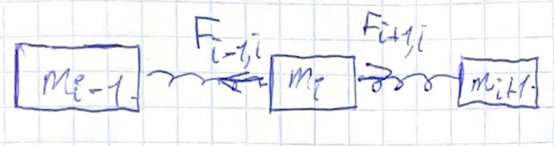  


После подстановки u в уравнения получается система линейных уравнений с нулевой правой частью, матрица B которой имеет вид: 

$b_{2} \in(1, \ldots, 2 N-2)$:
$b_{i i}=m_{i} w^{2}-2 k$ \
$b_{i i-1}=k ;\ b_{i, i+1}=k$;

$i=2 N - 1: \ b_{2 N - 1, 2 N - 2}=k$;  
$b_{2 N - 1, 2 N - 1}=m_{i} w^{2}-2 k$;  
$b_{2 N - 1, 0}=k ;$

$b_{00}=m_{0} w^{2}-2 k$;\
$b_{01}=k$; \
$b_{02 N-1}=k$ 

Определитель этой матрицы равен нулю - это условие нахождения частот.


$A=\frac{-B}{m_{i}}+\lambda E \quad, \quad \lambda=\omega^{2}$

$\left[   
\quad a_{i i-1}=\frac{k}{m_{i}}\right.$
$a_{i i}=\frac{2 k}{m_{i}}, \quad a_{i i+1}=\frac{k}{m_{i}}$

${a}_{00}=\frac{2 k}{m_{0}} ;  \quad a_{0 1}=\frac{k}{m_{0}}; $
$a_{0,2 N-1}=\frac{k}{m_{0}}$

${a}_{2 N-1, 2 N-1}=\frac{2 k}{m_{2 N-1}} ;  \quad a_{2 N-1, 0}=\frac{k}{m_{0}}; $
$a_{2 N-1, 2 N-2}=\frac{k}{m_{0}}$

Умножим все элементы матрицы на M, получаем:


$$A=k \cdot\left(\begin{array}{ccccccc}
2 \kappa & -\kappa & 0 & & 0 & 0 & -\kappa \\
-1 & 2 & -1 & \cdots & 0 & 0 & 0 \\
0 & -\kappa & 2 \kappa & & 0 & 0 & 0 \\
& \vdots & & \ddots & & \vdots & \\
0 & 0 & 0 & & 2 & -1 & 0 \\
0 & 0 & 0 & \cdots & -\kappa & 2 \kappa & -\kappa \\
-1 & 0 & 0 & & 0 & -1 & 2
\end{array}\right) $$